In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from itertools import combinations_with_replacement

In [4]:
(7/3)**(0.5)

1.5275252316519468

## 1 Distance calculation

In [2]:
def disc_to_square(z):
    ang=np.angle(z)
    if (ang>=np.pi/4 and ang<3*np.pi/4) or (ang>=-3*np.pi/4 and ang<-np.pi/4):
        w=z/np.abs(np.sin(ang))
    else:
        w=z/np.abs(np.cos(ang))
    return w
    
def square_to_disc(w):
    ang=np.angle(w)
    if (ang>=np.pi/4 and ang<3*np.pi/4) or (ang>=-3*np.pi/4 and ang<-np.pi/4):
        z=w*np.abs(np.sin(ang))
    else:
        z=w*np.abs(np.cos(ang))
    return z

In [4]:
(4-2*2**0.5)**0.5

1.0823922002923938

In [5]:
k=50
wk=np.array([np.complex(0.5,w) for w in np.linspace(-1,1,k)])
zk=np.array([square_to_disc(w) for w in wk])

zs=np.linspace(-1,1,10)
W=np.array([[np.complex(i,j) for i in zs] for j in zs]).ravel()
Z=np.array([square_to_disc(w) for w in W])
print(len(W))

100


In [13]:
lam=[]
for i in range(100):
    for j in range(i+1,100):
        dz=np.abs(Z[i]-Z[j])
        dw=np.abs(W[i]-W[j])
        #print(dz)
        lam.append(dz/dw)
        m=np.array(lam).max()
        if dz/dw>=m:
            z1=Z[i];z2=Z[j]
print(np.array(lam).max())

1.1291933583316802


In [16]:
print(np.abs(z1-z2))

0.5611006908824256


In [18]:
w1=disc_to_square(z1);w2=disc_to_square(z2)
print(z1,z2);print(w1,w2);print(np.abs(w1-w2))

(-0.39283710065919314-0.39283710065919314j) (-0.9486832980505138-0.31622776601683794j)
(-0.5555555555555556-0.5555555555555556j) (-1-0.33333333333333337j)
0.49690399499995325


1.4142135623730947 1.0540925533894598 0.5555555555555557 0.9999999999999999


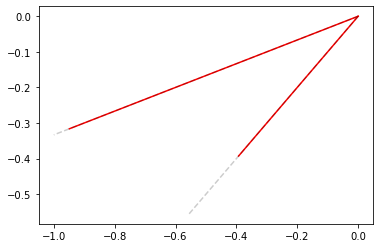

In [26]:
plt.plot([0,z1.real],[0,z1.imag],c='r')
plt.plot([0,z2.real],[0,z2.imag],c='r')
plt.plot([0,w1.real],[0,w1.imag],c='k',linestyle='--',alpha=0.2)
plt.plot([0,w2.real],[0,w2.imag],c='k',linestyle='--',alpha=0.2)
a=np.abs(w1/z1);b=np.abs(w2/z2);r1=np.abs(z1);r2=np.abs(z2)
print(a,b,r1,r2)

In [29]:
ang1=np.angle(z1);ang2=np.angle(z2);the=np.cos(ang1-ang2);print(the)
c=a/b;r=r1/r2;print(c,r)

0.8944271909999159
1.3416407864998734 0.5555555555555558


In [34]:
(r1**2+r2**2-2*r1*r2*the)**0.5

0.5611006908824256

In [38]:
dz=(1-2*r*the+r**2);
dw=(1-2*c*r*the+c**2*r**2)
print(dz,dw,dz-dw)

0.3148339853087353 0.2222222222222222 0.09261176308651309


In [35]:
((1-2*r*the+r**2)/(b**2*(1-2*c*r*the+c**2*r**2)))**0.5

1.12919335833168